In [2]:
import numpy as np  #handling data arrays
from sklearn.cluster import DBSCAN  #Providing DBSCAN implementation, making it easy to apply clustering and outlier detection
import matplotlib.pyplot as plt #to visualize the clusters and outliers
from sklearn.datasets import make_blobs  # for generating sample data

In [4]:
#Preparing data by generating a sample dataset using make_blob
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.6, random_state=0)
#300 data points with 3 defined clusters

outliers = np.random.uniform(low=-10, high=10, size=(20, 2))
#20 random points within a range to simulate outliers
X = np.vstack([X, outliers])  
#Combine clusters and outliers into one array

#Displaying the shape of the dataset to confirm
print("Data shape:", X.shape)

#X now contains clusters and outliers

Data shape: (320, 2)


Applying DBSCAN
Epsilon (eps): Defines the radius of the neighborhood around each point.
min_samples: Minimum number of points required to form a dense region (core point).

In [6]:
#Initializing the DBSCAN model with eps and min_samples
dbscan = DBSCAN(eps=0.8, min_samples=5)

#Fitting DBSCAN to the data X and assigning a label to each point.
#Points in the same cluster get the same label (e.g., 0, 1, 2), 
#while points labeled -1 are considered noise (outliers).
labels = dbscan.fit_predict(X)

# Display the unique labels assigned to each point
print("Unique labels (clusters and noise):", set(labels))
#Clusters are labelled as 0 and 1
#Outliers are labelled as -1

Unique labels (clusters and noise): {np.int64(0), np.int64(1), np.int64(-1)}


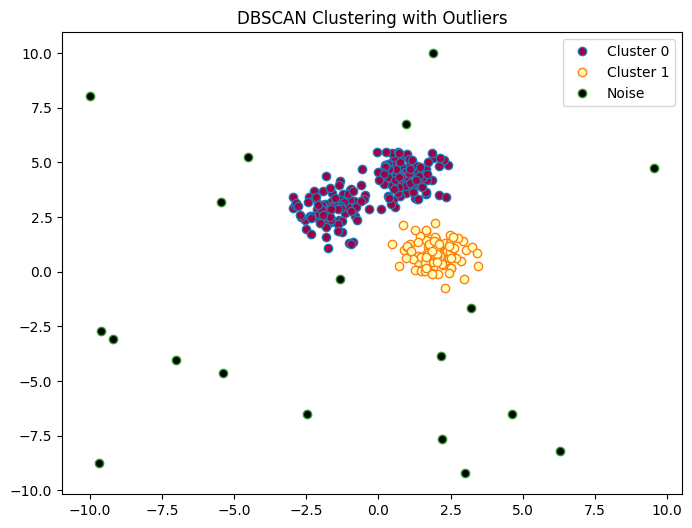

In [8]:
#Visualizing Data
#Set up colors for each cluster and noise to be able to distinguish between them
unique_labels = set(labels)  # Unique labels from DBSCAN output
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

#Plot the data points with colors indicating clusters and noise
plt.figure(figsize=(8, 6))

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black color for noise (outliers)
        col = [0, 0, 0, 1]

    #Points that belong to the current cluster (or noise)
    class_member_mask = (labels == k)
    
    #Core points in the current cluster
    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markersize=6, label=f"Cluster {k}" if k != -1 else "Noise")

plt.title('DBSCAN Clustering with Outliers')
plt.legend()
plt.show()